In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sequencer

In [3]:
data = np.loadtxt("../../Filtered_Flux_Grid_Velocity")
print (data)

[[0.27290062 0.2809246  0.27686964 ... 0.59805439 0.59939182 0.59871337]
 [0.30772679 0.30135338 0.30355706 ... 0.14044164 0.14131697 0.13986541]
 [0.13137625 0.13476227 0.14956229 ... 0.17953893 0.17865801 0.17810789]
 ...
 [0.18921121 0.19378757 0.19862628 ... 0.12615073 0.12579949 0.12581579]
 [0.38700453 0.3819038  0.37707654 ... 0.15094197 0.15181672 0.1520266 ]
 [0.40784167 0.39868918 0.39076825 ... 0.13319909 0.13311624 0.13294004]]


In [4]:
offset_data = data *100+100
print(offset_data)

[[127.29006154 128.09245973 127.68696359 ... 159.80543919 159.93918192
  159.87133721]
 [130.77267883 130.13533785 130.35570552 ... 114.04416376 114.13169717
  113.9865414 ]
 [113.13762452 113.47622683 114.95622869 ... 117.95389329 117.86580141
  117.81078904]
 ...
 [118.92112093 119.37875733 119.86262818 ... 112.61507332 112.57994907
  112.58157898]
 [138.70045266 138.19038038 137.70765445 ... 115.09419714 115.18167241
  115.20265974]
 [140.78416744 139.86891753 139.07682452 ... 113.31990863 113.31162381
  113.29400426]]


Sequencer Code

In [5]:
x = np.linspace(3722.0, 6912.0, num=len(data[0]))
print(x)

[3722. 3724. 3726. ... 6908. 6910. 6912.]


In [6]:
indices = np.arange(len(offset_data))
np.random.shuffle(indices)

objects_list_shuffled = offset_data[indices]
grid = np.copy(x)

In [7]:
# define the list of distance metrics to consider.
# I don't include the KL-Divergence because the dataset contains zero values
estimator_list = ['EMD', 'energy', 'L2']

# define the sequencer object with default parameters
seq = sequencer.Sequencer(grid, offset_data, estimator_list)

# to execute the sequencer, we first need to define the output directory to which the different 
# outputs will be saved
output_path = "/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer_output"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 2.3778932094573975 seconds
calculating the distance matrices for estimator: EMD, scale: 2
finished calculating this distance matrix list, it took: 2.7189600467681885 seconds
calculating the distance matrices for estimator: EMD, scale: 4
finished calculating this distance matrix list, it took: 3.4161829948425293 seconds
calculating the distance matrices for estimator: EMD, scale: 8
finished calculating this distance matrix list, it took: 7.47866415977478 seconds
calculating the distance matrices for estimator: EMD, scale: 16
finished calculating this distance matrix list, it took: 8.671027898788452 seconds
calculating the distance matrices for estimator: EMD, scale: 32
finished calculating this distance matrix list, it took: 13.304910898208618 seconds
calculating the distance matrices for estimator: EMD, scale: 64
finished calculating this distance matrix list, it took

/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer/sequencer_.py:1030: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


In [8]:
# print all the metrics and scales, and examine the intermediate elongations
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   np.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 29.11
metric=EMD, scale=2, elongation: 18.03
metric=EMD, scale=4, elongation: 10.33
metric=EMD, scale=8, elongation: 14.58
metric=EMD, scale=16, elongation: 12.9
metric=EMD, scale=32, elongation: 8.14
metric=EMD, scale=64, elongation: 9.25
metric=energy, scale=1, elongation: 35.06
metric=energy, scale=2, elongation: 20.06
metric=energy, scale=4, elongation: 14.01
metric=energy, scale=8, elongation: 13.32
metric=energy, scale=16, elongation: 10.7
metric=energy, scale=32, elongation: 8.09
metric=energy, scale=64, elongation: 9.2
metric=L2, scale=1, elongation: 14.98
metric=L2, scale=2, elongation: 10.01
metric=L2, scale=4, elongation: 8.91
metric=L2, scale=8, elongation: 11.08
metric=L2, scale=16, elongation: 9.46
metric=L2, scale=32, elongation: 7.61
metric=L2, scale=64, elongation: 7.07


In [9]:
print(final_sequence)
np.savetxt('../../Velocity_Sequence', final_sequence, "%i")

[116  77  78  14  39  38  37 107 108   3 100  47  25  48 106  26  46  18
  24  17  62  40  97  23  61  45   0  27  22  60  59  21  87  88  34  86
   6  85  16  43  64  44   2  42  84  15  98  79   1   5  35  82 121 120
 113  83  81 119  80  33 118  32 125  58  36 117  57  52  73  50  74 124
 112  51  54  31 104 111  30  72  94 105  49  29 110  56   9  92 101  75
 109  28  66  67  90  91  11  63 103  95  19  68   8 122  71  12  53   7
  96  41  13  69  65  55  89  93  70 123  99 114 115 102  20   4  76  10]


[[0.29654768 0.30294688 0.31365201 ... 0.12061999 0.12034049 0.11945875]
 [0.2033     0.23672166 0.21733984 ... 0.18312396 0.17839935 0.17459863]
 [0.40784167 0.39868918 0.39076825 ... 0.13319909 0.13311624 0.13294004]
 ...
 [0.2993787  0.30843851 0.30943866 ... 0.14416208 0.14336408 0.14382213]
 [0.21486241 0.20770584 0.20189464 ... 0.14960109 0.14422297 0.13829892]
 [0.43862137 0.41783862 0.40462852 ... 0.15222056 0.15004629 0.15163398]]


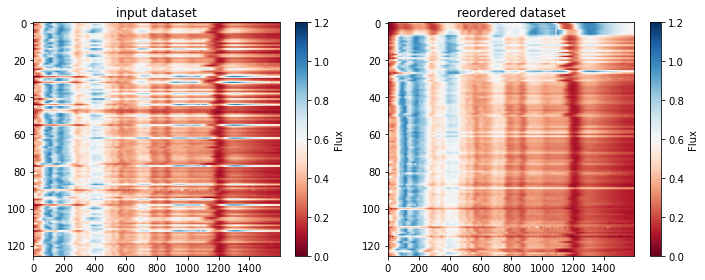

In [10]:
reordered_data = data[final_sequence, :]
np.random.shuffle(data)
print (data)
plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.imshow(data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.subplot(1, 2, 2)
plt.title("reordered dataset")
plt.imshow(reordered_data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.tight_layout()
plt.savefig('../../Velocity_Image.pdf', dpi = 300, bbox_inches = 'tight')

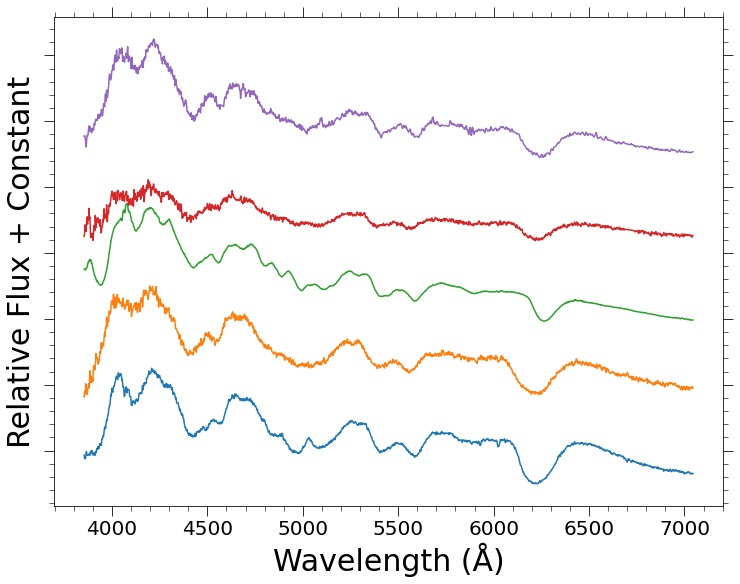

In [11]:
data = np.loadtxt("../../Filtered_Flux_Grid_Velocity")

wavelength = []
x = 3854

while len(wavelength) < len(data[0]):
    wavelength.append(x)
    x += 2

plt.figure(figsize=(12,9))
plt.xlabel("Wavelength (Å)", fontsize = 30)
plt.ylabel("Relative Flux + Constant", fontsize = 30)

plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)

plt.gca().axes.yaxis.set_ticklabels([])

k=0
while k < (len(final_sequence)):
    k+=1
    if k % 25 == 0:
        plt.plot(wavelength, data[final_sequence[k]]+k/40)

plt.savefig('../../Velocities.pdf', dpi = 300, bbox_inches = 'tight')